# PROJECT MACHINE LEARNING #1
## ALGERIAN FOREST FIRES

## MADE BY :
#### - Maxime BALLESTEROS PEREZ
#### - Anthony BERNABEU
#### - Tiago CLARENC
#### - Léo LAGARDE
#### - Allison STEPHENS
#### - Brunilda QUSHKU

### INTRODUCTION

FWI (Fire Weather Index) definition : https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system

### 1 - DATA EXTRACTION

In [1]:
# All imports

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# code so we can import functions from src folder

import os
import sys

# import python scripts we created to help with feature engineering
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.learning_curve_plot import learning_curve_plot

In [9]:

forest_data = pd.read_csv("../data/algerian_forest_fires.csv")



In [10]:
forest_data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [11]:
forest_data.shape

(243, 14)

In [12]:
# Number of rows :
print('- Number of rows in our dataset : ', forest_data.shape[0])

# Number of columns :
print('- Number of columns in our dataset : ', forest_data.shape[1])


- Number of rows in our dataset :  243
- Number of columns in our dataset :  14


In [13]:
forest_data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [14]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.7+ KB


### 2 - EXPLORATORY DATA ANALYSIS (EDA)

In [15]:
# Numerical Values
numerical_columns = list(forest_data.select_dtypes(['int64']) + forest_data.select_dtypes(['float64']))
#numerical_columns
print('- The numerical columns are : ', numerical_columns)


- The numerical columns are :  ['BUI', 'DC', 'DMC', 'FFMC', 'FWI', 'ISI', 'RH', 'Rain', 'Temperature', 'Ws', 'day', 'month', 'year']


In [16]:
# Categorical Values
categorical_columns = list(forest_data.select_dtypes(['object']))
#categorical_columns
print('- The categorical columns are : ', categorical_columns)


- The categorical columns are :  ['Classes']


In [17]:
cat_values=[]

for c in categorical_columns:
    
    cat_values.append({"categorical_feature_name" : c, "count" : len(forest_data[c].unique())})

pd.DataFrame(cat_values)


,categorical_feature_name,count
0,Classes,2


In [18]:
std_dev = forest_data.std()
print("Standard Deviation of each column :  ", std_dev)

Standard Deviation of each column :   day            8.842552e+00
month          1.114793e+00
year           2.278430e-13
Temperature    3.628039e+00
RH             1.482816e+01
Ws             2.811385e+00
Rain           2.003207e+00
FFMC           1.434964e+01
DMC            1.239304e+01
DC             4.766561e+01
ISI            4.154234e+00
BUI            1.422842e+01
FWI            7.440568e+00
dtype: float64


/var/folders/8j/7n34843d16760smbwy7x_sxw0000gn/T/ipykernel_782/1789277034.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_dev = forest_data.std()


In [19]:
c_matrix = forest_data.corr()
c_matrix

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,0.180543,0.065608,NaN,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895
BUI,0.517117,0.085073,NaN,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973


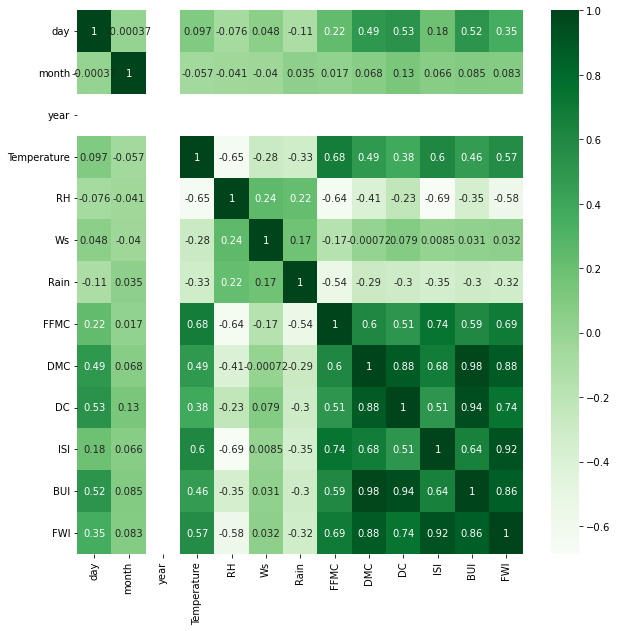

In [20]:
# Plot the correlation matrix thanks to seaborn

plt.figure(figsize = (10, 10))

sns.heatmap(c_matrix, cmap = "Greens", annot = True)

plt.show()



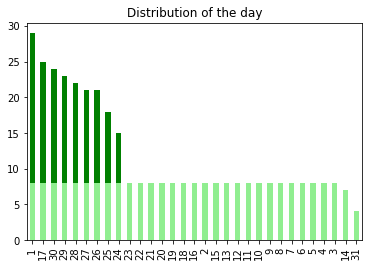

In [21]:

forest_data.Temperature.value_counts(dropna= False).plot(kind = 'bar', color = "green")


# var can be modified
var = "day"
forest_data[var].value_counts(dropna= False).plot(kind = 'bar', color = "lightgreen")

plt.title (f"Distribution of the {var}")
plt.show()

/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='day', ylabel='Density'>

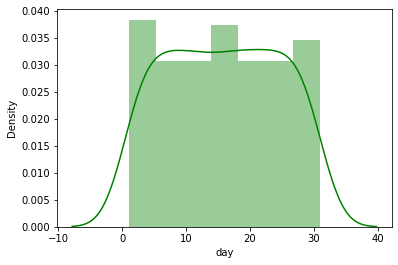

In [22]:
sns.distplot(forest_data.day, color = "green")

<Figure size 720x720 with 0 Axes>

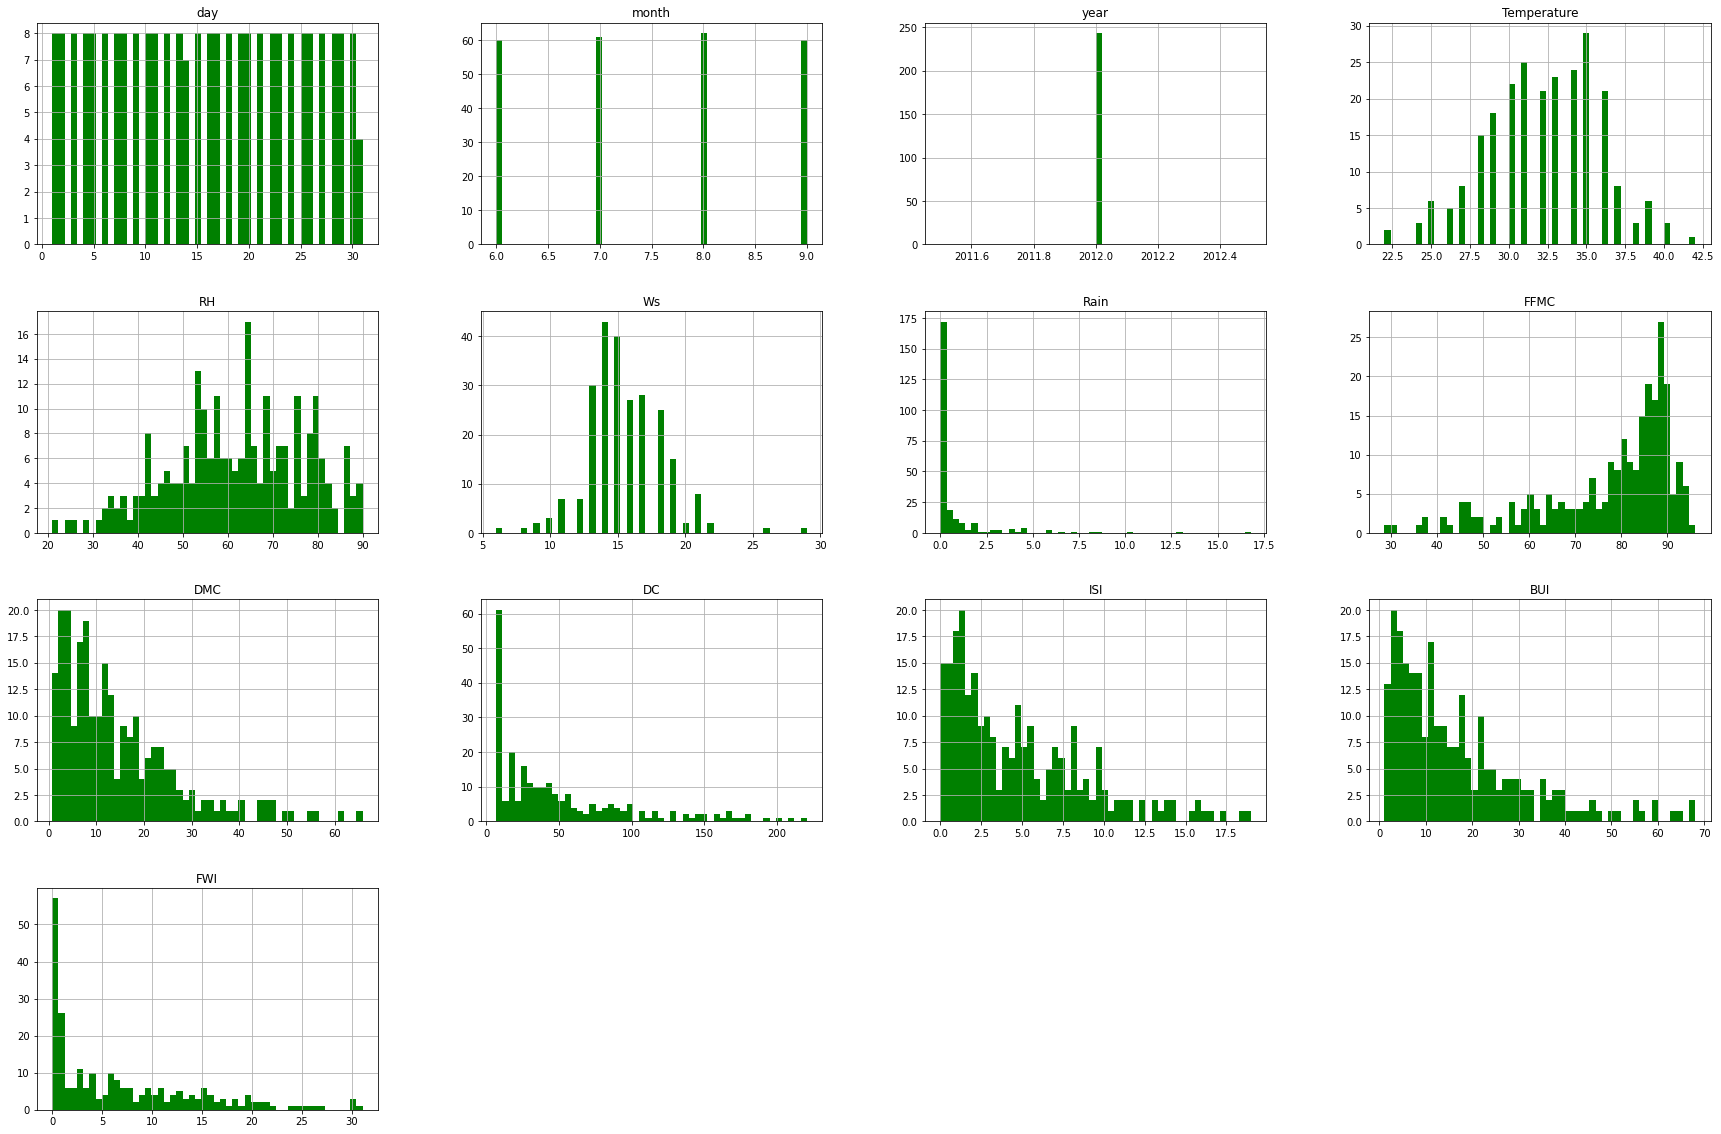

In [23]:
#explore the distribution of numerical data

plt.figure(figsize = (10,10))

forest_data.hist(bins = 50 , figsize=(30 , 20), color = "green");

plt.show()


#### FOCUSING ON : Temperature

In [24]:
forest_data.Temperature.describe()

count    243.000000
mean      32.152263
std        3.628039
min       22.000000
25%       30.000000
50%       32.000000
75%       35.000000
max       42.000000
Name: Temperature, dtype: float64

In [25]:
forest_data.Temperature.mode()

0    35
dtype: int64

Text(0.5, 1.0, 'applying logarithmic transformation on Temperature')

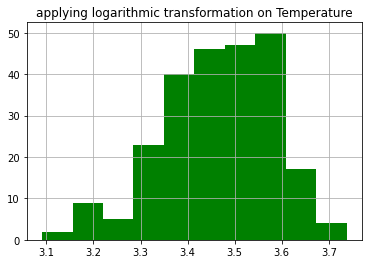

In [26]:
np.log(forest_data.Temperature).hist(color = "green")
plt.title("applying logarithmic transformation on Temperature")

Text(0.5, 1.0, 'Distribution of Temperature')

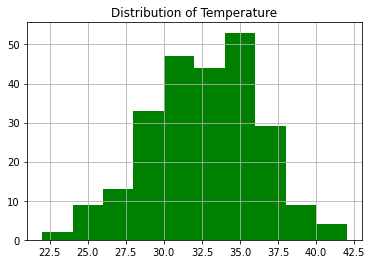

In [27]:
(forest_data.Temperature).hist(color = "green")
plt.title("Distribution of Temperature")

Text(0.5, 1.0, 'applying logarithmic transformation on RH')

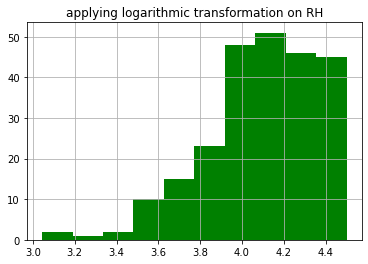

In [28]:
np.log(forest_data.RH).hist(color = "green")
plt.title("applying logarithmic transformation on RH")

Text(0.5, 1.0, 'Distribution on RH')

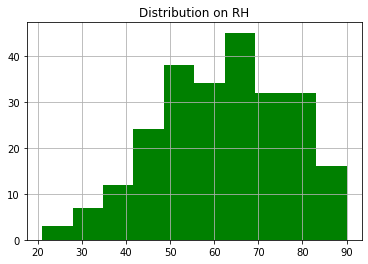

In [29]:
(forest_data.RH).hist(color = "green")
plt.title("Distribution on RH")

Text(0.5, 1.0, 'applying logarithmic transformation on WS')

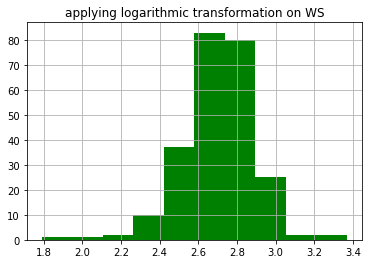

In [30]:
np.log(forest_data.Ws).hist(color = "green")
plt.title("applying logarithmic transformation on WS")

Text(0.5, 1.0, 'Distribution on WS')

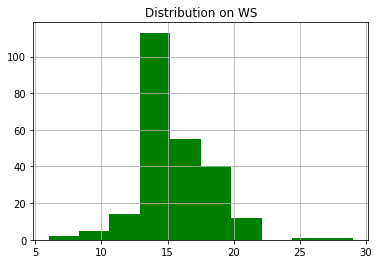

In [31]:
(forest_data.Ws).hist(color = "green")
plt.title("Distribution on WS")

### 3 - DATA CLEANING

In [32]:
target = forest_data.FWI
target


0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [33]:
target.describe()

count    243.000000
mean       7.035391
std        7.440568
min        0.000000
25%        0.700000
50%        4.200000
75%       11.450000
max       31.100000
Name: FWI, dtype: float64

In [34]:
features = forest_data.drop(['FWI'], axis = 1)
features

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,fire
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,not fire
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,not fire
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,not fire


In [35]:
features.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000


In [36]:
# Feature Selection - Drop Features that we have identified as “redundant” 
# and will not use for our machine learning model

# Check Missing data

forest_data.isnull().sum()



day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

### 4 - FEATURE ENGINEERING

In [37]:
def one_hot(df, categorical_cols):
    """
    This definition can be used to one hot encode categorical data
    
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    
    @return a DataFrame with one-hot encoding
    """
    
    for c in categorical_cols:
        dummies = pd.get_dummies(df[c], prefix=c)
        df = pd.concat([df, dummies], axis=1)
        df.drop(c, axis = 1, inplace = True)
    
    return df

In [38]:
# Encode all variables

print(forest_data.shape)

categorical_columns = list(forest_data.select_dtypes(['object']))
forest_data_encoded = one_hot(forest_data, categorical_columns)

print(forest_data_encoded.shape)


(243, 14)
(243, 15)


In [39]:
forest_data_encoded.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_fire,Classes_not fire
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


### 5 - MODEL TRAINING

In [40]:
features = forest_data_encoded.drop(['FWI'], axis = 1)
features

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes_fire,Classes_not fire
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,0
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [41]:
# Shapes of target & features

print("- Shape of the target value : ", target.shape)

print("- Shape of the feature values : ", features.shape)


- Shape of the target value :  (243,)
- Shape of the feature values :  (243, 14)


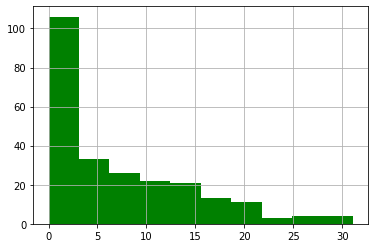

In [42]:
# Distribution of target
target.hist(color = "green");


In [43]:
# PLOT FOR DECISION TREE BASED MODELS

def feature_importance_plot(model, X_train, n):
    """Plots feature importance - this only works for Decision Tree based Models"""
    plt.figure(figsize=(8, 5)) # set figure size
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'bar')
    plt.title(f"Top {n} Features")
    plt.show()

#### LINEAR REGRESSION

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [45]:
# Create train & test sets

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 0)


In [46]:
print("Shape of the training set X : ", X_train.shape)
print("Shape of the testing set X : ", X_test.shape)
print("Shape of the training set y : ", y_train.shape)
print("Shape of the testing set y : ", y_test.shape)


Shape of the training set X :  (194, 14)
Shape of the testing set X :  (49, 14)
Shape of the training set y :  (194,)
Shape of the testing set y :  (49,)


In [47]:
# Use of StandardScaler to scale the data & fit to X_train

# To standardize every feature in our dataset

scaler = StandardScaler()
scaler.fit(X_train)

# transform training data
X_train_scaled = scaler.transform(X_train)


In [48]:
print("Shape of the training set X scaled : ", X_train_scaled.shape)

Shape of the training set X scaled :  (194, 14)


In [49]:
# Import the Logistic Regression model from sklearn and call it lr

lr = LinearRegression()
lr


LinearRegression()

In [50]:
# Fit the model on the training data

lr.fit(X_train_scaled, y_train)


LinearRegression()

In [51]:
# Evaluate how well the model predicts on unseen data aka "test data"

y_pred = lr.predict(X_test)


In [52]:
# We compare the first predicted values with our actual value, to have an overview on how good (or bad) we predicted

print("- First five predicted total amounts : ", y_pred[0:5])
print("- First five actual total amounts : ", list(y_test[0:5]))



- First five predicted total amounts :  [ -6.00011893   2.74464971 -12.94128157  -8.59264319 -18.30187028]
- First five actual total amounts :  [9.7, 7.2, 8.0, 6.3, 7.7]


NB. : Linear Regression has no attributes "features importances"

#### DECISION TREE REGRESSOR

In [53]:
# import scikit learn libraries
from sklearn.tree import DecisionTreeRegressor


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [54]:
# Build the model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)


DecisionTreeRegressor()

In [55]:
# Make predictions and call this variable y_pred_dt
y_pred_dt = dt.predict(X_test)


In [56]:
# Optional: Print the first five predicted vs actual values
print("first five predicted values : ", y_pred_dt[0:5])
print("first five actual values : ", list(y_test[0:5]))


first five predicted values :  [9.8 8.  7.5 4.2 9.8]
first five actual values :  [9.7, 7.2, 8.0, 6.3, 7.7]


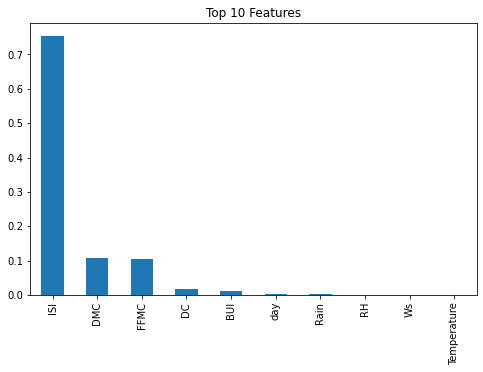

In [57]:
# We plot the feature importance

feature_importance_plot(dt, X_train, n = 10)


/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning

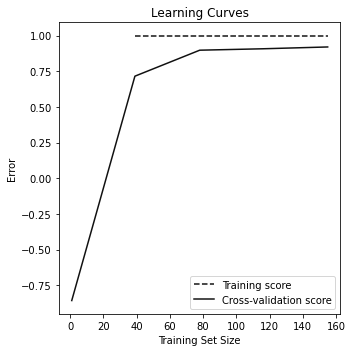

In [58]:
learning_curve_plot(dt, X_train, y_train, scoring='r2')

#### RANDOM FOREST REGRESSOR

In [60]:
from sklearn.ensemble import RandomForestRegressor


In [61]:
# Build the model
rf =RandomForestRegressor()
rf.fit(X_train, y_train)


RandomForestRegressor()

In [62]:
# Make predictions and call this variable y_pred_dt
y_pred_rf = rf.predict(X_test)


In [63]:
# Optional: Print the first five predicted vs actual values
print("first five predicted values:", y_pred_rf[0:5])
print("first five actual values:", list(y_test[0:5]))


first five predicted values: [10.473  7.413  7.182  4.913  8.763]
first five actual values: [9.7, 7.2, 8.0, 6.3, 7.7]


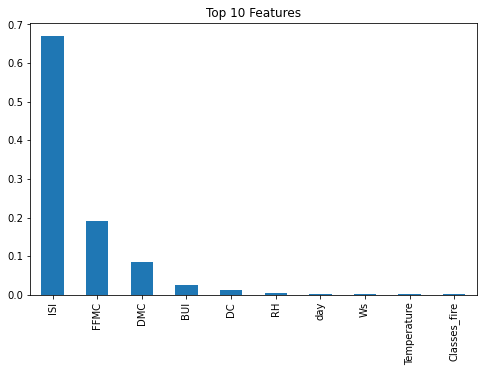

In [64]:
feature_importance_plot( rf, X_train, n = 10)

/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning

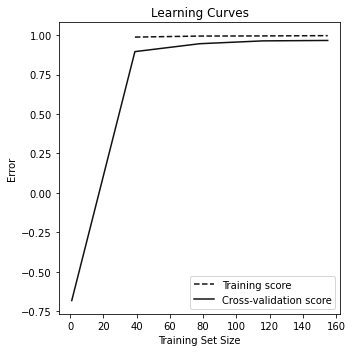

In [65]:
learning_curve_plot(rf, X_train, y_train, scoring='r2')

 - From the learning curve plots we see that all three models show a lot of bias & low variance. Signs of overfitting are also present

#### XGBOOST REGRESSOR

In [66]:
from xgboost import XGBRegressor


In [67]:
# Build the model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [68]:
# Make predictions and call this variable y_pred_dt
y_pred_xgb = xgb.predict(X_test)


In [69]:
# Optional: Print the first five predicted vs actual values
print("first five predicted values:", y_pred_xgb[0:5])
print("first five actual values:", list(y_test[0:5]))


first five predicted values: [10.53474    5.951585   7.1775784  4.792294   8.659513 ]
first five actual values: [9.7, 7.2, 8.0, 6.3, 7.7]


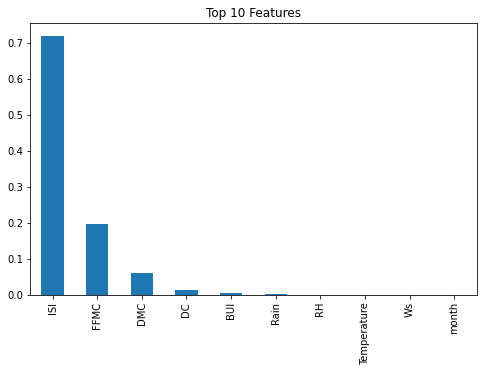

In [70]:
feature_importance_plot(xgb, X_train, n = 10)

/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning

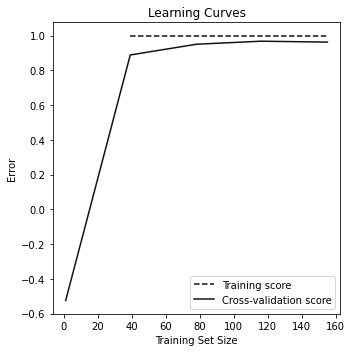

In [71]:
learning_curve_plot(xgb, X_train, y_train, scoring='r2')

### 6 - PERFORMANCE EVALUATION

#### LINEAR REGRESSION - EVALUATION

In [145]:
# R2 score to evaluate performance of the ML model

r2 = r2_score(y_test, y_pred)

print("R2 SCORE for LINEAR REGRESSION : ", round(r2,4))



R2 SCORE for LINEAR REGRESSION :  -42.3203


In [146]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print("MEAN SQUARED ERROR for LINEAR REGRESSION : ", round(mse, 4))


MEAN SQUARED ERROR for LINEAR REGRESSION :  1637.0733


In [147]:
mae = mean_absolute_error(y_test, y_pred)
print("MEAN ABSOLUTE ERROR for LINEAR REGRESSION : ", mae)

MEAN ABSOLUTE ERROR for LINEAR REGRESSION :  34.92378100020782


#### DECISION TREE REGRESSOR - EVALUATION

In [142]:
# the evaluation metrics for the model on the test set
r2 = r2_score(y_test, y_pred_dt)
print("R2 Score for DECISION TREE : ", round(r2, 2))


R2 Score for DECISION TREE :  0.97


In [143]:
# MAE
mae = mean_absolute_error(y_test, y_pred_dt)
print("Mean Absolute Error for DECISION TREE : ", round(mae))


Mean Absolute Error for DECISION TREE :  1


In [144]:
# MSE
mse = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error  for DECISION TREE : ", round(mse))


Mean Squared Error  for DECISION TREE :  1


#### RANDOM FOREST REGRESSOR - EVALUATION

In [139]:
# the evaluation metrics for the model on the test set
r2 = r2_score(y_test, y_pred_rf)
print("R2 Score for RANDOM FOREST :", round(r2, 2))


R2 Score for RANDOM FOREST : 0.99


In [140]:
# MAE
mae = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error for RANDOM FOREST :", round(mae))


Mean Absolute Error for RANDOM FOREST : 0


In [141]:
# MSE
mse = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error for RANDOM FOREST :", round(mse))


Mean Squared Error for RANDOM FOREST : 0


#### XGBOOST REGRESSOR - EVALUATION

In [133]:
# the evaluation metrics for the model on the test set
r2 = r2_score(y_test, y_pred_xgb)
print("R2 Score for XGBOOST : ", round(r2, 2))


R2 Score for XGBOOST :  0.98


In [134]:
# MAE
mae = mean_absolute_error(y_test, y_pred_xgb)
print("MEAN ABSOLUTE ERROR for XGBOOST : ", round(mae))


MEAN ABSOLUTE ERROR for XGBOOST :  1


In [135]:
# MSE
mse = mean_squared_error(y_test, y_pred_xgb)
print("MEAN SQUARED ERROR for XGBOOST : ", round(mse))


MEAN SQUARED ERROR for XGBOOST :  1
